In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Input, layers
from tensorflow.keras import activations
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import backend as k
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Czech - English

## Training set 

In [2]:
# corpus_scor = "C:/Users/pc/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/de-en/scores.csv"
# corpus_path_ref = "C:/Users/pc/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/de-en/laser.reference_embeds.npy"
# corpus_path_source = "C:/Users/pc/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/de-en/laser.source_embeds.npy"
# corpus_path_translation = "C:/Users/pc/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/de-en/laser.translation_embeds.npy"

In [3]:
corpus_scor = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/cs-en/scores.csv"
corpus_path_ref = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/cs-en/laser.reference_embeds.npy"
corpus_path_source = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/cs-en/laser.source_embeds.npy"
corpus_path_translation = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/corpus/cs-en/laser.translation_embeds.npy"

In [4]:
corpus_scores = pd.read_csv(corpus_scor)
corpus_reference = np.load(corpus_path_ref, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
corpus_source = np.load(corpus_path_source, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
corpus_translation = np.load(corpus_path_translation, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

In [5]:
# [h; r; h s; h  r; |h − s|; |h − r|] 

# Dot product Translation + source
h_dot_s = np.dot(corpus_translation,corpus_source.T)

# dot product tranlation reference
h_dot_r = np.dot(corpus_translation,corpus_reference.T)

# Absolute difference translation-source
abs_h_s = np.absolute(corpus_translation - corpus_source)
abs_h_s.shape

# Absolute difference translation-reference
abs_h_r = np.absolute(corpus_translation - corpus_reference)
abs_h_r.shape

train = np.concatenate((corpus_translation,corpus_reference,h_dot_s,h_dot_r,abs_h_s,abs_h_r),axis=1)

little_train = np.concatenate((corpus_translation,corpus_reference,abs_h_r),axis=1)

print(h_dot_s.shape,h_dot_r.shape)
print(abs_h_s.shape,abs_h_r.shape)
print(train.shape,little_train.shape )

(11585, 11585) (11585, 11585)
(11585, 1024) (11585, 1024)
(11585, 27266) (11585, 3072)


In [6]:
test_scor = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/testset/cs-en/scores.csv"
testset_path_ref = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/testset/cs-en/laser.reference_embeds.npy"
testset_path_source = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/testset/cs-en/laser.source_embeds.npy"
testset_path_translation = "C:/Users/m20200655/OneDrive - NOVAIMS/2º Semestre 2021/Text Mining/Project/Project laser embeddings/testset/cs-en/laser.translation_embeds.npy"

In [7]:
test_score = pd.read_csv(test_scor)
testset_reference = np.load(testset_path_ref, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
testset_source = np.load(testset_path_source, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
testset_translation = np.load(testset_path_translation, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

In [9]:
test_score.tail()

,source,reference,translation
8727,Convercent vybral v rámci své únorové kampaně ...,Convercent picked in the framework of its Febr...,Convercent raised $10 million in funding in Fe...
8728,Kde všude mohou Češi volit?,Where can the Czechs to vote?,Where in the world can Czechs vote?
8729,Hlavní zkoušky letošní rekonstrukce započaly v...,The main test of this year's renovation began ...,Rehearsals for this year's production began in...
8730,"Většina z tisíců vražd, ke kterým dochází každ...",Most of the thousands of murders occurring eve...,As with most of the thousands of murders tied ...
8731,Proti tomu je Mitt Romney ztělesněním zdravého...,Against this is Mitt Romney the epitome of com...,Making Mitt Romney seem the epitome of common ...


In [8]:
# [h; r; h s; h  r; |h − s|; |h − r|] 

# Dot product Translation + source
h_dot_s = np.dot(testset_translation,testset_source.T)

# dot product tranlation reference
h_dot_r = np.dot(testset_translation,testset_reference.T)

# Absolute difference translation-source
abs_h_s = np.absolute(testset_translation - testset_source)
abs_h_s.shape

# Absolute difference translation-reference
abs_h_r = np.absolute(testset_translation - testset_reference)
abs_h_r.shape

test = np.concatenate((testset_translation,testset_reference,h_dot_s,h_dot_r,abs_h_s,abs_h_r),axis=1)

little_test = np.concatenate((testset_translation,testset_reference,abs_h_r),axis=1)

print(h_dot_s.shape,h_dot_r.shape)
print(abs_h_s.shape,abs_h_r.shape)
print(test.shape,little_test.shape )

(8732, 8732) (8732, 8732)
(8732, 1024) (8732, 1024)
(8732, 21560) (8732, 3072)


# Simple feed forward network

<!-- # LSTM
## Text Classification with RNN - bi-directional 
https://www.tensorflow.org/tutorials/text/text_classification_rnn -->

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [10]:
reference_labels = np.array(corpus_scores['z-score'])
reference_labels.shape

(11585,)

In [11]:
X = little_train
X.shape

(11585, 3072)

In [12]:
Y = reference_labels
Y.shape

(11585,)

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(9268, 3072) (9268,)
(2317, 3072) (2317,)


In [14]:
# # X_train = X_train.reshape(-1,1,1024)
# # X_val = X_val.reshape(-1,1,1024)
# # Y_train = Y_train.reshape(-1,1,1)
# # Y_val = Y_val.reshape(-1,1,1)
# # print(X_train.shape,Y_train.shape)
# # print(X_val.shape,Y_val.shape)

# X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

# # Y_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[1],1)

# X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# Y_val=Y_val.reshape(Y_val.shape[0],Y_val.shape[1],1)

# print(X_train.shape,Y_train.shape)
# print(X_val.shape,Y_val.shape)

In [15]:
# Callbacks
batch_size =10248

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=25)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0001,
                              patience=5, min_lr=0.0001)

mcp = ModelCheckpoint('model.h5', 
                      monitor='val_loss', verbose=1, 
                      save_best_only=True, save_weights_only=True)

In [16]:
# model with better results 
model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation = 'relu'))
# model.add(Dropout(0.1))
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation ='relu'))
model.add(Dense(1))

In [17]:
# # Callbacks

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.0001,
#                               patience=5, min_lr=0.00001)

# mcp = ModelCheckpoint('model.h5', 
#                       monitor='val_loss', verbose=0, 
#                       save_best_only=True, save_weights_only=True)

# batch_size = 14336

# model = Sequential()

# model.add(Dense(2048, input_shape=(X_train.shape[1],), activation = 'relu'))
# # model.add(Dropout(0.1))
# model.add(Dense(1024, activation ='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(512, activation ='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation ='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(128, activation ='relu'))
# model.add(Dense(1))

In [18]:
model.compile(loss=tf.keras.losses.MSE,
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['mae'])

In [19]:
print("Fit model on training data")
history = model.fit(
    X_train,
    Y_train,
    epochs=150, # previous 1000
    batch_size =batch_size,# previous one 8192 #4096 - best score so far
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, Y_val),verbose =0, callbacks=[early_stop,reduce_lr]) # validation_split=0.2,mcp

Fit model on training data


(0.0, 1.394529715180397)

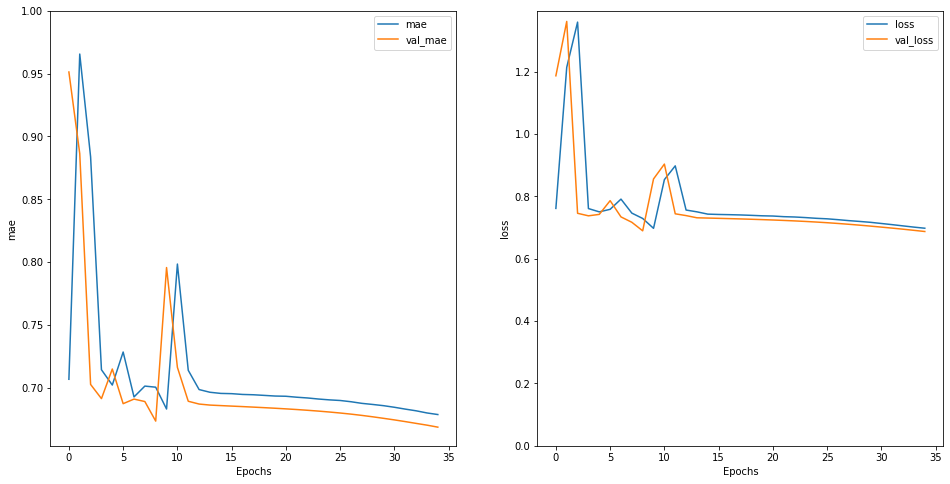

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'mae')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [21]:
# Evaluate the model on the test data using `evaluate`

print("Evaluate on test data")
results = model.evaluate(X_val, Y_val, batch_size=batch_size)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 501us/step - loss: 0.6872 - mae: 0.6685
test loss, test acc: [0.6871801018714905, 0.6685090065002441]


# predicting @ test data

In [22]:
# Generate predictions (probabilities -- the output of the last layer) on new data using `predict`
print("Generate predictions samples")
predictions = model.predict(little_test)
print("predictions shape:", predictions.shape)

Generate predictions samples
predictions shape: (8732, 1)


In [23]:
test_score['lp'] = 'cs-en'
test_score['score'] = predictions
test_score.head()

,source,reference,translation,lp,score
0,"Památník, důstojné pietní místo, stojí vůlí dě...","The monument, a dignified piecemeal place, sta...","The memorial, a solemn place of commemoration,...",cs-en,0.046766
1,Pracovník centra Čang Č-čung sdělil agentuře N...,Centre worker Zhang Zu-chung told the New Chin...,Centre worker Chang Chi-Chung told New China t...,cs-en,0.009788
2,Veterináři nicméně odeberou namátkové vzorky v...,"However, veterinarians take random samples of ...","However, veterinarians are taking samples of e...",cs-en,0.120391
3,Uživatel @TheePharoah jí neustále retweetoval ...,User @ TheePharoah constantly retweeted her po...,A user with the handle @TheePharoah was being ...,cs-en,-0.165789
4,Lucii bylo tehdy pouhých 19 let a rozhodně net...,Lucia was only 19 at the time and certainly ha...,"At that time, Lucie was only 19 years old, and...",cs-en,-0.088124


In [24]:
test_score.to_csv('cs-en_predictions.csv')

# checking corr @ X_val

In [25]:
# Generate predictions (probabilities -- the output of the last layer) on new data using `predict`
print("Generate predictions samples")
predictions = model.predict(X_val)
print("predictions shape:", predictions.shape)

Generate predictions samples
predictions shape: (2317, 1)


In [26]:
corr_data = pd.DataFrame([Y_val]).T
pred = pd.DataFrame(predictions)
corr_data['predictions'] = pred
corr_data.columns = ['z-score','predictions']
corr_data.corr()

,z-score,predictions
z-score,1.000000,0.402606
predictions,0.402606,1.000000
